In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    return img 

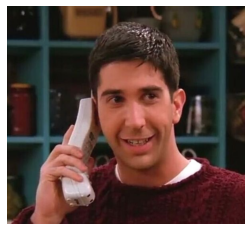

In [3]:
filename = "ross.jpg"
img = read_file(filename)

org_img = np.copy(img)

In [4]:
def edge_mask(img, line_size, blur_value):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray, blur_value)
    
    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, line_size, blur_value)
    plt.axis('off')
    
    
    return edges


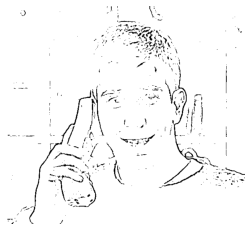

In [5]:
line_size, blur_value = 5,5
edges = edge_mask(img, line_size, blur_value)
plt.imshow(edges, cmap= "gray")
plt.show()

In [6]:
def color_quantization(img, k):
    data = np.float32(img).reshape((-1,3))
    
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    plt.axis('off')
    
    return result
    

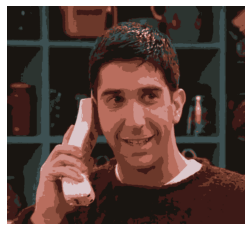

In [7]:
img = color_quantization(img, k=9)
plt.imshow(img)
plt.show()

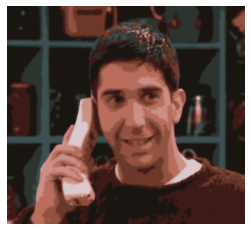

In [8]:
blurred = cv2.bilateralFilter(img, d = 7, sigmaColor= 200, sigmaSpace= 200)
plt.axis('off')

plt.imshow(blurred)
plt.show()

In [9]:
def cartoon():
    c = cv2.bitwise_and(blurred, blurred, mask= edges)
    
    plt.imshow(org_img)
    plt.title("Original Image")
    plt.axis('off')
    plt.show()
    
    plt.imshow(c)
    plt.title("Cartoonified Image")
    plt.axis('off')
    plt.show()
    

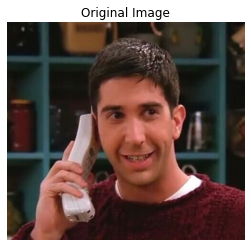

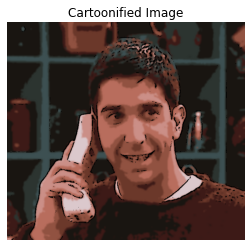

In [10]:
cartoon()
